In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sanity check

This file is to conduct basic sanity check on the data process.

## Check if party was not merged properly

Read files.

In [10]:
results = pd.read_parquet("/net/lazer/lab-lazer/shared_projects/google_audit_reproduce/intermedidate_files/house_parquet_no_error/20201030.parquet")

In [11]:
results.groupby('party', dropna=False).count()

,type,sub_rank,title,url,text,cmpt_rank,serp_rank,crawl_id,qry,lang,loc_id,sub_type,timestamp,subtitle,domain
party,,,,,,,,,,,,,,,
Democrat,1884460,1884460,1313795,1821860,272075,1884460,1884460,1884460,1884460,1884460,1884460,95247,289709,0,1821860
Independent,13423,13423,9577,12958,1269,13423,13423,13423,13423,13423,13423,859,1269,0,12958
Republican,1487034,1487034,1055739,1447944,211637,1487034,1487034,1487034,1487034,1487034,1487034,63705,232277,0,1447944


In [22]:
results[results['type']=='search_related'].groupby('domain', dropna=False).count()

,type,sub_rank,title,url,text,cmpt_rank,serp_rank,crawl_id,qry,lang,loc_id,sub_type,timestamp,subtitle
domain,,,,,,,,,,,,,,


# Check daily results

Import result file that has the daily record of results.

In [2]:
results = pd.read_csv('/net/lazer/lab-lazer/shared_projects/google_audit_reproduce/intermedidate_files/merged_summary/cleaned_house_day_qry_loc.csv')

In [3]:
results

,crawl_id,qry,loc_id,counts
0,20200901,Abby Finkenauer,"AK-AT LARGE,Alaska,United States",6
1,20200901,Abby Finkenauer,"AL-1,Alabama,United States",23
2,20200901,Abby Finkenauer,"AL-2,Alabama,United States",15
3,20200901,Abby Finkenauer,"AL-3,Alabama,United States",23
4,20200901,Abby Finkenauer,"AL-4,Alabama,United States",15
...,...,...,...,...
36119471,20210331,Zoe Lofgren,"WI-8,Wisconsin,United States",19
36119472,20210331,Zoe Lofgren,"WV-1,West Virginia,United States",19
36119473,20210331,Zoe Lofgren,"WV-2,West Virginia,United States",19
36119474,20210331,Zoe Lofgren,"WV-3,West Virginia,United States",19


# Number of qry

The number of unique names of U.S. representatives members used as queries that are included in the final analysis.

In [4]:
qry_counts = results.groupby(['qry'], dropna=True, as_index=False)['counts'].sum()

In [5]:
len(qry_counts)

425

# Total results

The total number of urls (i.e. results) in the search results.

In [6]:
results['counts'].sum()

np.int64(660900513)

In [41]:
844795210 - 660900513

183894697

In [42]:
183894697/200/435/25

84.5492859770115

# Total without NA

In [44]:
results.dropna()['counts'].sum()

np.int64(633984769)

# Number of days

The number of days that searches are successful.

In [7]:
day_counts = results.groupby(['crawl_id'], dropna=True, as_index=False)['counts'].sum()

In [8]:
day_counts['date']= pd.to_datetime(day_counts['crawl_id'], format='%Y%m%d')

In [9]:
day_counts = day_counts.sort_values('date', ascending=True)

In [34]:
len(day_counts)

200

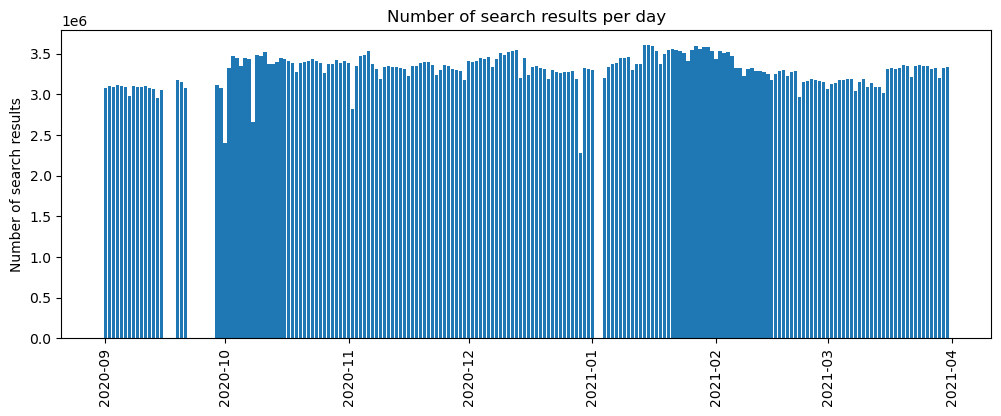

In [10]:
fig = plt.figure(figsize = (12, 4))

plt.bar(day_counts['date'], day_counts['counts'])
plt.xticks(rotation='vertical')

plt.ylabel("Number of search results")
plt.title("Number of search results per day")
plt.savefig("../data/plots/num_results_by_day.png", bbox_inches='tight', dpi=200) 
plt.show()

## Daily resutls

Average number of results per qry per location for a day.

In [11]:
avg_num_result_per_page = results['counts'].mean()

In [12]:
avg_num_result_per_page

np.float64(18.29762184257601)

# Get non-processed dates

Get the missing dates that are not in the data due to techniqual issue on these days.

In [13]:
from datetime import date, timedelta

sdate = date(2020,9,1)   # start date
edate = date(2021,4,1)   # end date

In [14]:
natural_dates = pd.date_range(sdate,edate-timedelta(days=1),freq='d').strftime('%Y%m%d').tolist()

In [30]:
dates_in_data = day_counts['crawl_id'].astype("string").unique().tolist()

In [32]:
missing_dates = set(natural_dates) - set(dates_in_data)

In [33]:
missing_dates

{'20200916',
 '20200917',
 '20200918',
 '20200922',
 '20200923',
 '20200924',
 '20200925',
 '20200926',
 '20200927',
 '20200928',
 '20210102',
 '20210103'}

# Check daily location

check the number of locations that searches are successfully simulated from for each day. It is supposed to be 435 congressional districts and 1 general serach.

In [42]:
loc_counts = results.groupby(['crawl_id', 'qry'], dropna=True, as_index=False)['loc_id'].count()

In [43]:
loc_counts

,crawl_id,qry,loc_id
0,20200901,Abby Finkenauer,436
1,20200901,Abigail Spanberger,436
2,20200901,Adam Kinzinger,436
3,20200901,Adam Schiff,436
4,20200901,Adam Smith,436
...,...,...,...
84650,20210331,Will Hurd,436
84651,20210331,William Timmons,436
84652,20210331,Xochitl Torres Small,436
84653,20210331,Yvette Clarke,436


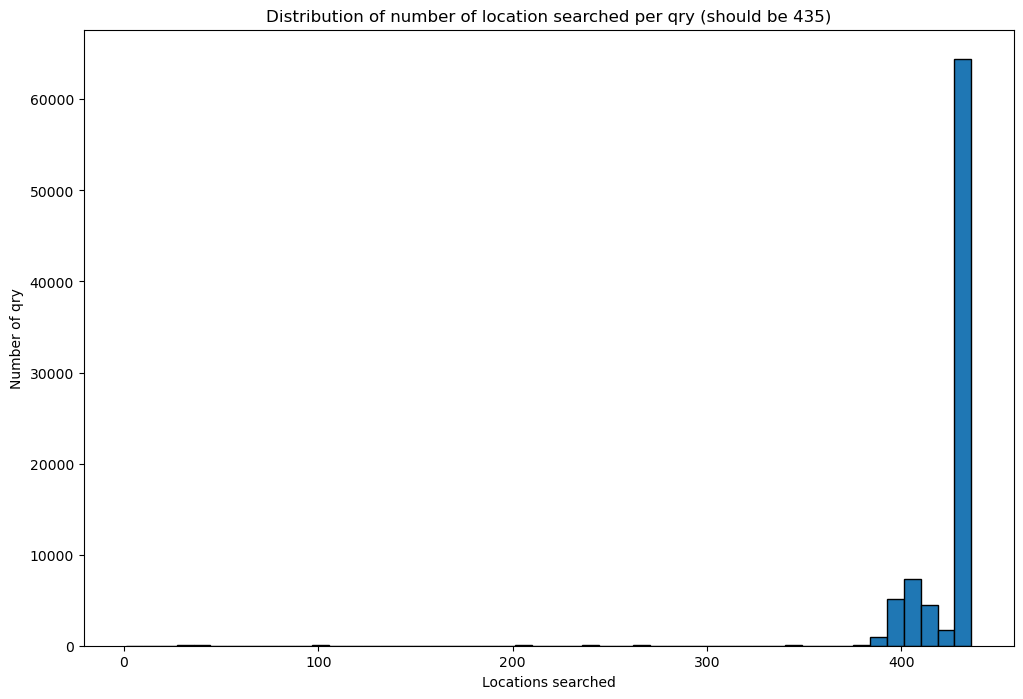

In [44]:
fig = plt.figure(figsize = (12, 8))

plt.hist(loc_counts['loc_id'], edgecolor='black', bins=50)
# plt.xticks(rotation='vertical')
 
plt.xlabel("Locations searched")
plt.ylabel("Number of qry")
plt.title("Distribution of number of location searched per qry (should be 435)")
plt.savefig("../data/plots/loc_counts_distribution.png", bbox_inches='tight', dpi=200) 
plt.show()

In [47]:
results['loc_id'].unique()

array(['AK-AT LARGE,Alaska,United States', 'AL-1,Alabama,United States',
       'AL-2,Alabama,United States', 'AL-3,Alabama,United States',
       'AL-4,Alabama,United States', 'AL-5,Alabama,United States',
       'AL-6,Alabama,United States', 'AL-7,Alabama,United States',
       'AR-1,Arkansas,United States', 'AR-2,Arkansas,United States',
       'AR-3,Arkansas,United States', 'AR-4,Arkansas,United States',
       'AZ-1,Arizona,United States', 'AZ-2,Arizona,United States',
       'AZ-3,Arizona,United States', 'AZ-4,Arizona,United States',
       'AZ-5,Arizona,United States', 'AZ-6,Arizona,United States',
       'AZ-7,Arizona,United States', 'AZ-8,Arizona,United States',
       'AZ-9,Arizona,United States', 'CA-1,California,United States',
       'CA-10,California,United States', 'CA-11,California,United States',
       'CA-12,California,United States', 'CA-13,California,United States',
       'CA-14,California,United States', 'CA-15,California,United States',
       'CA-16,California,